# Modelo
Lo primero que se hace separar en subconjuntos por días, es decir se sacan los subconjuntos de grupos para cada día y se soluciuona el modelo para cada día.

## Conjuntos

* $I$: Conjunto de clases  
* $J$: Conjunto Salones  
* $K$: Conjunto Franjas horarias Horas 

## Parametros

$M_{ij}$: 1 si el salón $j$ tienes los medios que requiere la clase $i$ 0 e.o.c

$C_{ij}$: 1 si el salón $j$ tiene la capacidad que requiere la clase $i$ 0 e.o.c.

$H_{ik}$: 1 si el la clase $i$ se debe dictar en la hora $k$ 0 e.o.c.

# Variables de desición

$X_{ijk}$: 1 si el la clase $i$ fue asignada a el salón $j$  0 e.o.c.

# Función Objetivo

$$
maximizar\left( \sum_{i \in I}\sum_{j \in j}\sum_{k \in K}X_{ij} H_{ik} \right)
$$

# Restricciones

* Solo puede haber un grupo asignada a un salon en un mismo horario 
$$\sum_{i \in I} X_{ij}H_{ik} \leq 1 \ \ \ \forall j \in J, \ \forall k \in K $$

* La grupo solo puede ser asignada en el horario que fue programada

$$ \sum_{j \in J} X_{ij}H_{ik} \leq H_{ik} \ \ \ \ \forall i \in I, \ \forall k \in K$$


* Cada grupo solo se puede asignar a un salón 

$$\sum_{j\in J} X_{ij} \leq 1  \ \ \ \ \forall i \in I$$


* El aula asignada debe tener los medios necesarios para dictar la clase

$$ X_{ij} M_{ij} = X_{ij} \ \ \ \ \forall i \in I, \ \forall j \in J$$

* El aula asignada debe tener la capacidad necesaria para el grupo

$$ X_{ij} C_{ij} = X_{ij} \ \ \ \ \forall i \in I, \ \forall j \in J$$


### Upload data

## Formas de implementar la tolerancia
Asignar la tolerancia de acuerdo a la capacidad del aula

In [6]:
# Instalar paquetes
!pip install pulp
!pip install import_from_github_com

# Importar paquetes
import pandas as pd
from github_com.kennethreitz import requests
from google.colab import files

# Buscar modulo en github
r = requests.get('https://raw.githubusercontent.com/johanmarin/Asing-room/main/asing_room.py')
with open('asing_room.py', 'w') as f:
  f.write(r.text)

# Importar modulo
from asing_room import run_model

In [7]:
# Upload file
path = list(files.upload().keys())[0]
tolerancia = 5

# resolviendo modelo
drai, prof, resp = run_model(path, tolerancia)

#Descargando información
with pd.ExcelWriter('output.xlsx') as writer:  
  drai.to_excel(writer, sheet_name='DRAI')
  prof.to_excel(writer, sheet_name='Departamento')

files.download('output.xlsx')

Saving InstanciaBloque19-PisoDos.xlsx to InstanciaBloque19-PisoDos (4).xlsx


/content/asing_room.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupos['MAX'][i] = df['MAX'][i]


Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
#Descargando información
with pd.ExcelWriter('output.xlsx') as writer:  
  drai.to_excel(writer, sheet_name='DRAI')
  prof.to_excel(writer, sheet_name='Departamento')

files.download('output.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
pd.DataFrame.from_dict(resp)

,Tolerancia,asignados,n_grupos,alumnos,sin_asignar,n_grupos_sin,alumnos_sin,prom_sub_uso,max_sub_uso,min_sub_uso
L,5,"[BII724-1, BII808-1, BII808-2, BII921-1, ICL24...",45,1411,"[IMT205-2, IQU435-2, ISA404-2, IMC273-2, INQ21...",199,6678,14.311111,38,0
M,5,"[BIF524-1, BII512-1, BII512-2, BII716-1, BII72...",99,3247,"[IQU524-3, IQU562-9, INM275-13, IMC273-2, INQ2...",145,4842,11.898990,45,0
W,5,"[BII120-1, BII408-1, BII516-1, BII616-1, BII71...",92,2891,"[IQU524-3, IQU562-9, INM275-13, IMT205-2, IQU4...",152,5198,12.706522,45,0
J,5,"[BIF524-1, BII512-1, BII512-2, BII716-1, BIM30...",97,3212,"[IQU524-3, IQU562-9, INM275-13, IMC273-2, INQ2...",147,4877,12.195876,45,0
V,5,"[BID520-1, BII120-1, BII408-1, BII516-1, BII61...",81,2571,"[IQU524-3, IQU562-9, INM275-13, IMT205-2, IQU4...",163,5518,12.641975,45,0
S,5,"[ICL247-1, IEI508-1, IEI612-1, IEO423-1, IEO99...",24,787,"[IQU524-3, IQU562-9, IMT205-2, IQU435-2, ISA40...",220,7302,12.208333,40,0


## Análisis de Sensibilidad

In [8]:
df = pd.DataFrame()
tolerancias = [1,2,3,4,5,6,7,8,9,10]
for tolerancia in tolerancias:
  # resolviendo modelo
  drai, prof, resp = run_model(path, tolerancia)
  df = pd.concat([df, pd.DataFrame.from_dict(resp)])

/content/asing_room.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grupos['MAX'][i] = df['MAX'][i]


Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal
Status: Optimal


In [10]:
df.head()

,Tolerancia,asignados,n_grupos,alumnos,sin_asignar,n_grupos_sin,alumnos_sin,prom_sub_uso,max_sub_uso,min_sub_uso
L,1,"[BII724-1, BII808-1, BII808-2, BII921-1, ICL24...",45,1411,"[IMT205-2, IQU435-2, ISA404-2, IMC273-2, INQ21...",199,6678,14.311111,38,0
M,1,"[BIF524-1, BII512-1, BII512-2, BII716-1, BII72...",99,3247,"[IQU524-3, IQU562-9, INM275-13, IMC273-2, INQ2...",145,4842,11.898990,45,0
W,1,"[BII120-1, BII408-1, BII516-1, BII616-1, BII71...",92,2891,"[IQU524-3, IQU562-9, INM275-13, IMT205-2, IQU4...",152,5198,12.706522,45,0
J,1,"[BIF524-1, BII512-1, BII512-2, BII716-1, BIM30...",97,3212,"[IQU524-3, IQU562-9, INM275-13, IMC273-2, INQ2...",147,4877,12.195876,45,0
V,1,"[BID520-1, BII120-1, BII408-1, BII516-1, BII61...",81,2571,"[IQU524-3, IQU562-9, INM275-13, IMT205-2, IQU4...",163,5518,12.641975,45,0


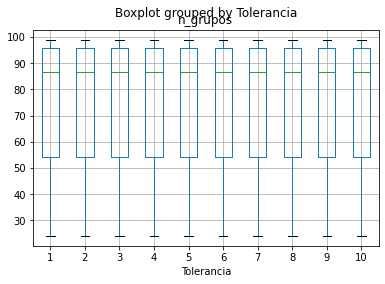

In [21]:
import matplotlib.pyplot as plt
df.boxplot('n_grupos', 'Tolerancia')

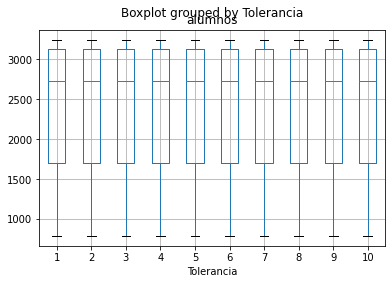

In [20]:
df.boxplot('alumnos','Tolerancia')